# 1. Import Ntuple

In [1]:
%load_ext autoreload
%autoreload 2

import uproot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
from tqdm.auto import tqdm
import sys
sys.path.append('/home/belle/zhangboy/inclusive_R_D/')
import utilities as util
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab20.colors)

training_variables = util.training_variables
columns = util.all_relevant_variables + ['B0_deltaE','B0_CMS2_weMbc','B0_CMS0_weDeltae']

In [2]:
# 4S Data vs MC, regions: q^2 < 3; 4.5<roeMbc<5.05; deltaE

# Load data files
MC_4S = uproot.concatenate([f'../../Samples/Generic_MC15ri/e_channel/MC15ri_local_200fb_control/*.root:B0'],
                          library="np",
                          #cut = '(D_M>1.855) & (D_M<1.885)',
                          filter_branch=lambda branch: branch.name in columns)

data_4S = uproot.concatenate([f'../../Samples/Data/e_channel/proc13_4S_control_quaxo_1.root:B0'],
                          library="np",
                          #cut = '(D_M>1.855) & (D_M<1.885)',
                          filter_branch=lambda branch: branch.name in columns)

df_mc_4S = pd.DataFrame(MC_4S)
df_data_4S = pd.DataFrame(data_4S)

BDT_continuum='signal_prob<0.3 and continuum_prob>0.8 and fakeD_prob<0.05'
BDT_sig='signal_prob==largest_prob and signal_prob>0.8 and continuum_prob<0.04 and fakeD_prob<0.05'
BDT_no_sig = 'signal_prob<0.3'

In [3]:
for df in [df_mc_4S,df_data_4S,]:
    # df.eval(f'cos_D_l = (D_px*ell_px + D_py*ell_py + D_pz*ell_pz)/(D_p*ell_p)', inplace=True)
    df.eval('B_D_ReChi2 = B0_vtxReChi2 + D_vtxReChi2', inplace=True)
    df.eval('p_D_l = D_CMS_p + ell_CMS_p', inplace=True)

In [4]:
df_mc_4S_BDT_sig = util.apply_mva_bcs(df_mc_4S, training_variables, BDT_sig)
df_data_4S_BDT_sig = util.apply_mva_bcs(df_data_4S, training_variables, BDT_sig)

In [4]:
# df_mc_BDT_conti = util.apply_mva_bcs(df_mc_4S, training_variables, BDT_continuum)
# df_data_BDT_conti = util.apply_mva_bcs(df_data_4S, training_variables, BDT_continuum)

# df_mc_BDT_no_sig = util.apply_mva_bcs(df_mc_4S, training_variables, BDT_no_sig)
# df_data_BDT_no_sig = util.apply_mva_bcs(df_data_4S, training_variables, BDT_no_sig)

In [5]:
columns_without_nan = df_data_4S_BDT_sig.columns[~df_data_4S_BDT_sig.isna().any()].tolist()

samples=util.get_dataframe_samples_new(df_mc_4S_BDT_sig, 'e', template=False)
mpl=util.mpl(samples,df_data_4S_BDT_sig)
# df_conti_conti = samples['bkg_continuum']
for name, df in samples.items():
    print(name, len(df))

bkg_FakeD 80287
bkg_TDFl 2704
bkg_fakeTracks 1864
bkg_continuum 3297
bkg_combinatorial 8508
bkg_singleBbkg 4736
bkg_other_TDTl 0
$D\tau\nu$ 1594
$D^\ast\tau\nu$ 1099
$D\ell\nu$ 23224
$D^\ast\ell\nu$ 18635
$D^{\ast\ast}\tau\nu$ 683
$D^{\ast\ast}\ell\nu$ 11370
$D\ell\nu$_gap 2939
bkg_other_signal 0


# Check Data vs. MC at control regions

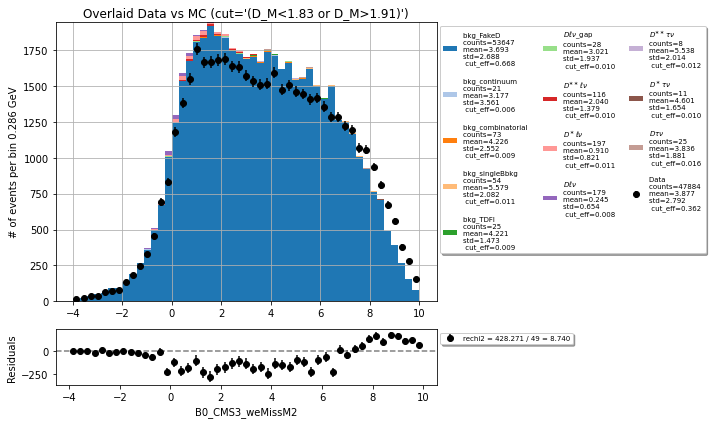

In [14]:
# sidebands
b1 = np.linspace(-4,10,50)
a,b=mpl.plot_data_mc_stacked(variable='B0_CMS3_weMissM2',bins=b1,figsize=(10,6),
                          cut='(D_M<1.83 or D_M>1.91)',
                          scale=[1,187/200],correction=False,mask=[],ratio=False,
                            legend_fs=7,legend_nc=3)

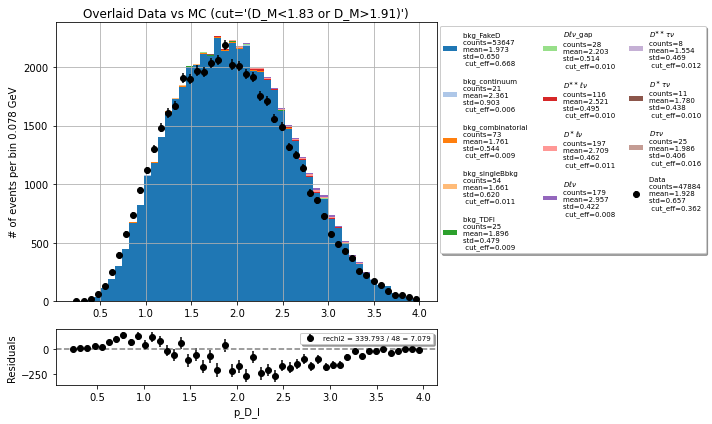

In [15]:
# sidebands
b2 = np.linspace(0.2,4,50)
a,b=mpl.plot_data_mc_stacked(variable='p_D_l',bins=b2,ratio=False,
                          cut='(D_M<1.83 or D_M>1.91)',
                          scale=[1,187/200],correction=False,mask=[],figsize=(10,6),
                            legend_fs=7,legend_nc=3)

## Templates shape in other control regions

### 1. roeMbc<5

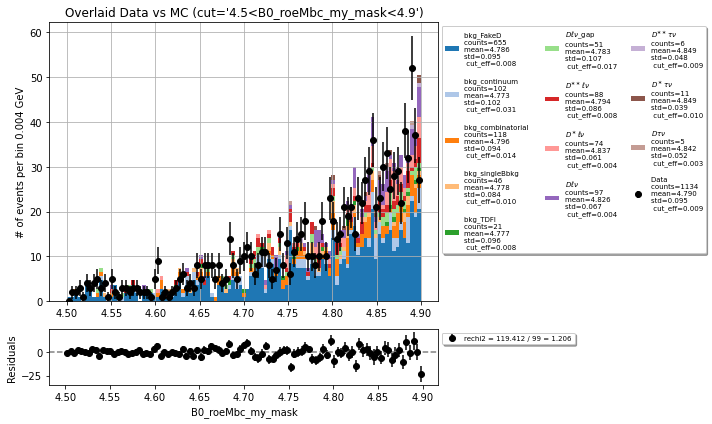

In [40]:
# showing the fake D and sidebands in D_M
b1 = np.linspace(4.5,4.9,100)
data_hist_all, mc_hist_all = mpl.plot_data_mc_stacked(
    variable='B0_roeMbc_my_mask',bins=b1,cut='4.5<B0_roeMbc_my_mask<4.9',scale=[1,187/200],
    correction=False,mask=[],figsize=(10,6),ratio=False,
                                legend_nc=3, legend_fs=7)

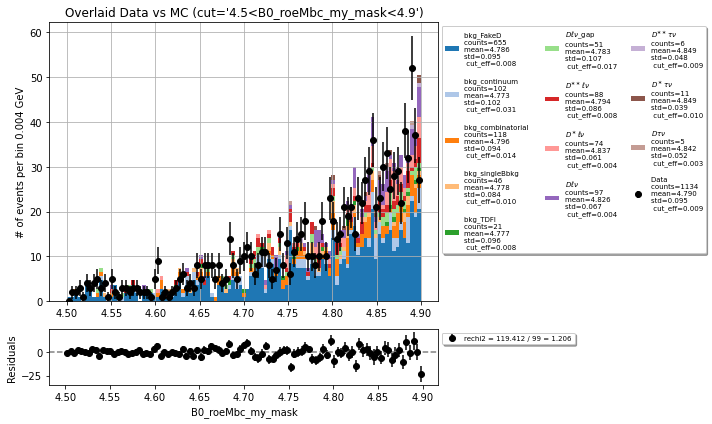

In [29]:
# showing the fake D and sidebands in D_M
b1 = np.linspace(4.5,4.9,100)
data_hist_all, mc_hist_all = mpl.plot_data_mc_stacked(
    variable='B0_roeMbc_my_mask',bins=b1,cut='4.5<B0_roeMbc_my_mask<4.9',scale=[1,187/200],
    correction=False,mask=[],figsize=(10,6),ratio=False,
                                legend_nc=3, legend_fs=7)

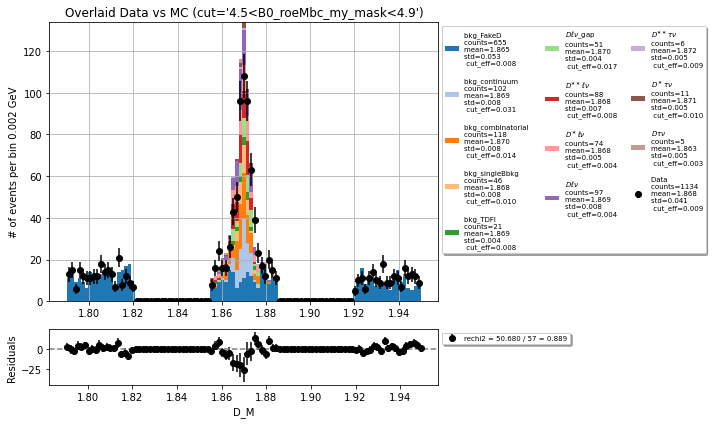

In [28]:
# showing the fake D and sidebands in D_M
b1 = np.linspace(1.79,1.95,100)
data_hist_all, mc_hist_all = mpl.plot_data_mc_stacked(
    variable='D_M',bins=b1,cut='4.5<B0_roeMbc_my_mask<4.9',scale=[1,187/200],
    correction=False,mask=[],figsize=(10,6),ratio=False,
                                legend_nc=3, legend_fs=7)

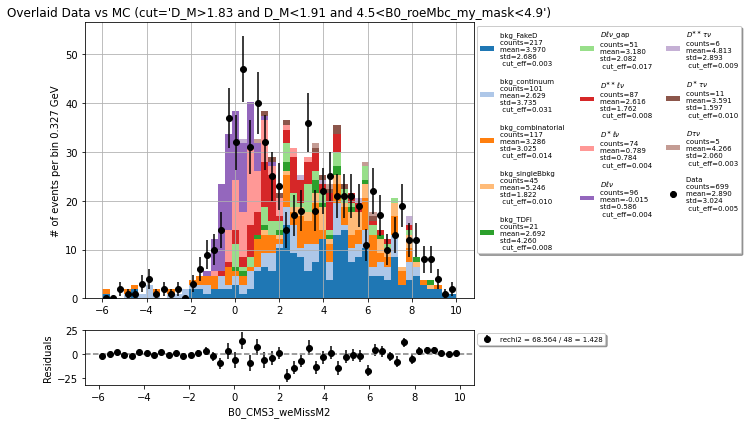

In [30]:
# signal
b1 = np.linspace(-6,10,50)
a,b=mpl.plot_data_mc_stacked(variable='B0_CMS3_weMissM2',bins=b1,figsize=(10,6),
                          cut='D_M>1.83 and D_M<1.91 and 4.5<B0_roeMbc_my_mask<4.9',
                          scale=[1,187/200],correction=False,mask=[],ratio=False,
                                                      legend_nc=3, legend_fs=7)

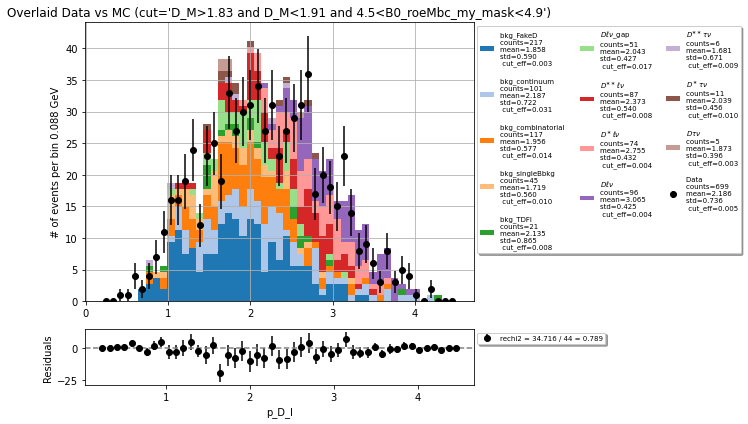

In [31]:
# signal
b2 = np.linspace(0.2,4.5,50)
a,b=mpl.plot_data_mc_stacked(variable='p_D_l',bins=b2,ratio=False,
                          cut='D_M>1.83 and D_M<1.91 and 4.5<B0_roeMbc_my_mask<4.9',
                          scale=[1,187/200],correction=False,mask=[],figsize=(10,6),
                                                      legend_nc=3, legend_fs=7)

### 2. 4<CMS2_weMbc<4.5

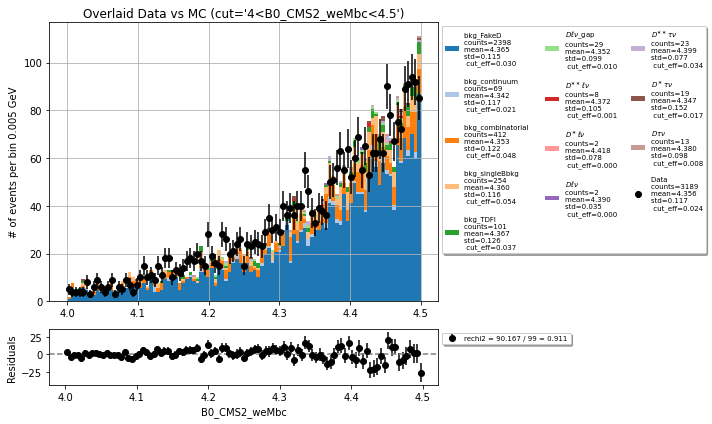

In [42]:
b1 = np.linspace(4,4.5,100)
data_hist_all, mc_hist_all = mpl.plot_data_mc_stacked(
    variable='B0_CMS2_weMbc',bins=b1,cut='4<B0_CMS2_weMbc<4.5',scale=[1,187/200],
    correction=False,mask=[],figsize=(10,6),ratio=False,
                                legend_nc=3, legend_fs=7)

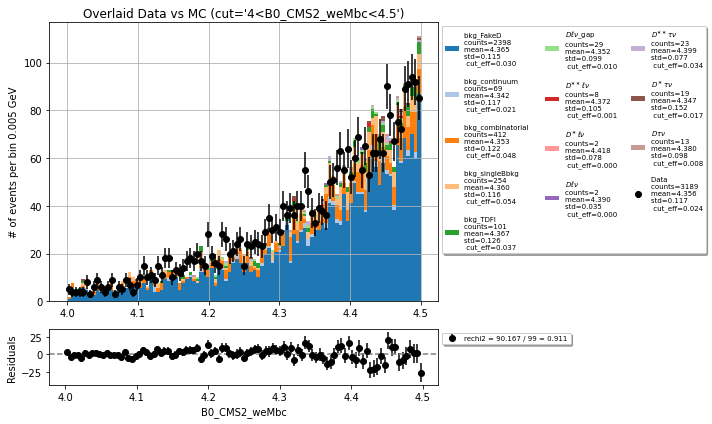

In [17]:
b1 = np.linspace(4,4.5,100)
data_hist_all, mc_hist_all = mpl.plot_data_mc_stacked(
    variable='B0_CMS2_weMbc',bins=b1,cut='4<B0_CMS2_weMbc<4.5',scale=[1,187/200],
    correction=False,mask=[],figsize=(10,6),ratio=False,
                                legend_nc=3, legend_fs=7)

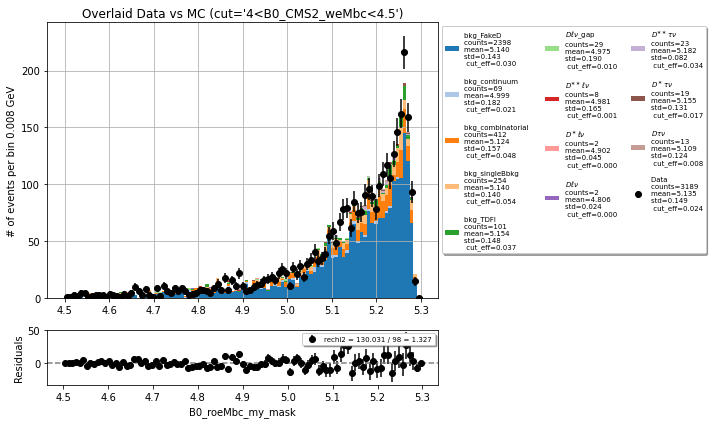

In [18]:
# showing the fake D and sidebands in D_M
b1 = np.linspace(4.5,5.3,100)
data_hist_all, mc_hist_all = mpl.plot_data_mc_stacked(
    variable='B0_roeMbc_my_mask',bins=b1,cut='4<B0_CMS2_weMbc<4.5',scale=[1,187/200],
    correction=False,mask=[],figsize=(10,6),ratio=False,
                                legend_nc=3, legend_fs=7)

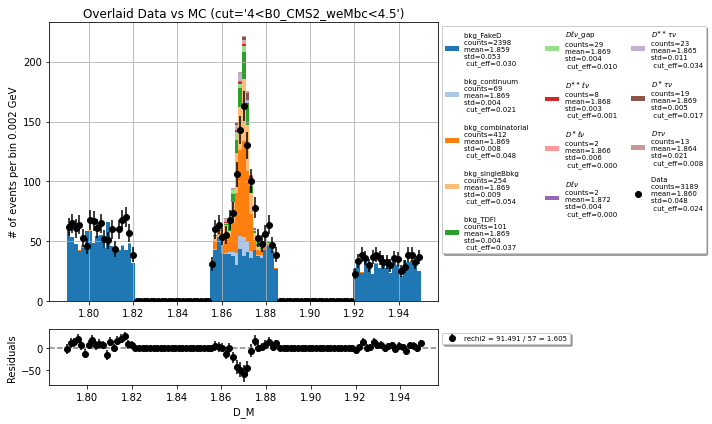

In [32]:
# showing the fake D and sidebands in D_M
b1 = np.linspace(1.79,1.95,100)
data_hist_all, mc_hist_all = mpl.plot_data_mc_stacked(
    variable='D_M',bins=b1,cut='4<B0_CMS2_weMbc<4.5',scale=[1,187/200],
    correction=False,mask=[],figsize=(10,6),ratio=False,
                                legend_nc=3, legend_fs=7)

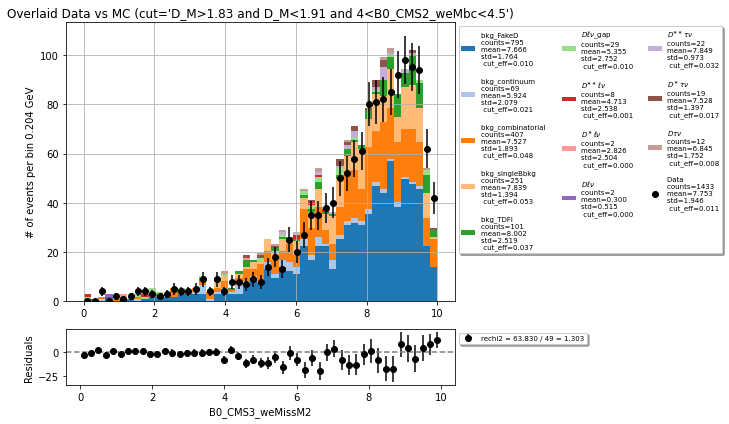

In [35]:
# signal
b1 = np.linspace(0,10,50)
a,b=mpl.plot_data_mc_stacked(variable='B0_CMS3_weMissM2',bins=b1,figsize=(10,6),
                          cut='D_M>1.83 and D_M<1.91 and 4<B0_CMS2_weMbc<4.5',
                          scale=[1,187/200],correction=False,mask=[],ratio=False,
                                                      legend_nc=3, legend_fs=7)

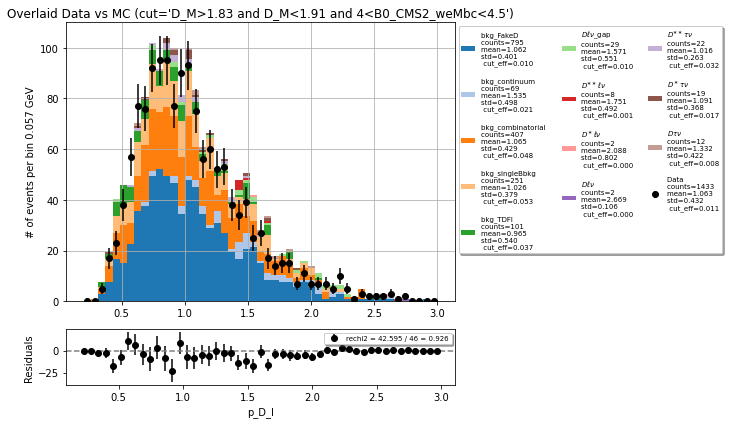

In [36]:
# signal
b2 = np.linspace(0.2,3,50)
a,b=mpl.plot_data_mc_stacked(variable='p_D_l',bins=b2,ratio=False,
                          cut='D_M>1.83 and D_M<1.91 and 4<B0_CMS2_weMbc<4.5',
                          scale=[1,187/200],correction=False,mask=[],figsize=(10,6),
                                                      legend_nc=3, legend_fs=7)

### 3. q^2 < 3

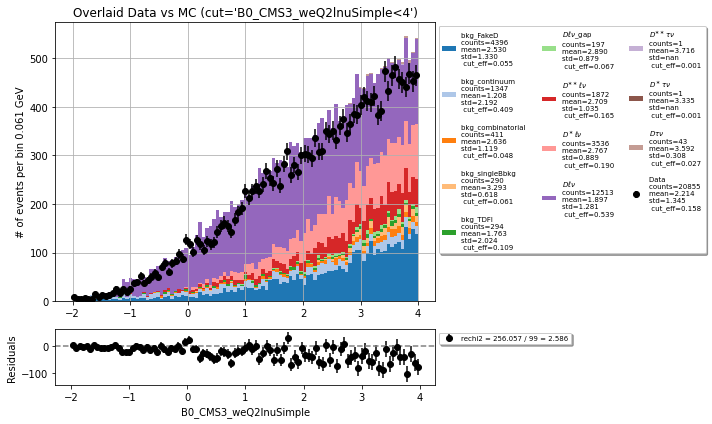

In [23]:
# showing the fake D and sidebands in D_M
b1 = np.linspace(-2,4,100)
data_hist_all, mc_hist_all = mpl.plot_data_mc_stacked(
    variable='B0_CMS3_weQ2lnuSimple',bins=b1,cut='B0_CMS3_weQ2lnuSimple<4',scale=[1,187/200],
    correction=False,mask=[],figsize=(10,6),ratio=False,
                                legend_nc=3, legend_fs=7)

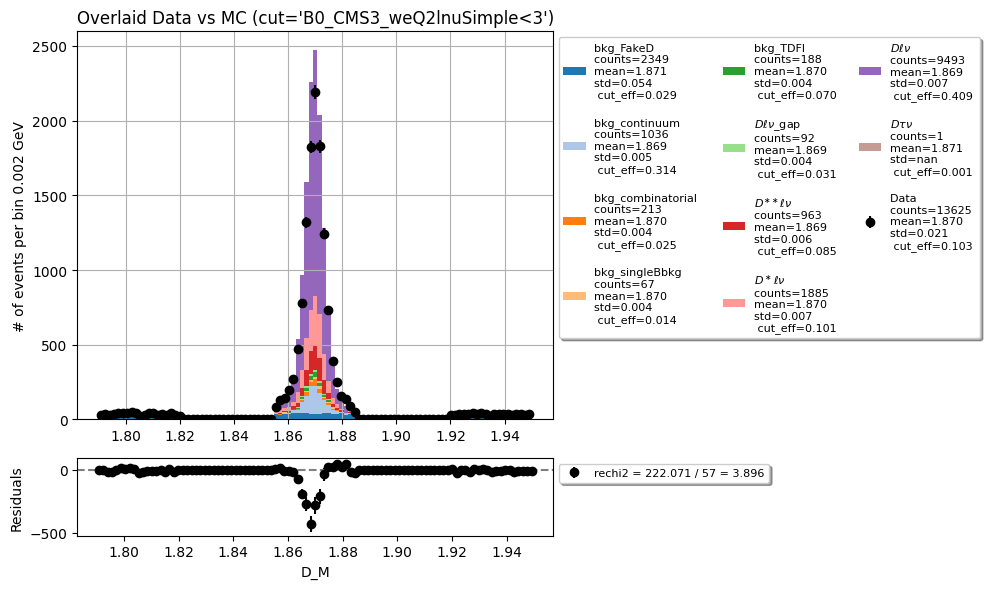

In [21]:
# showing the fake D and sidebands in D_M
b1 = np.linspace(1.79,1.95,100)
data_hist_all, mc_hist_all = mpl.plot_data_mc_stacked(
    variable='D_M',bins=b1,cut='B0_CMS3_weQ2lnuSimple<3',scale=[1,187/200],
    correction=False,mask=[],figsize=(10,6),ratio=False,
                                legend_nc=3, legend_fs=8)

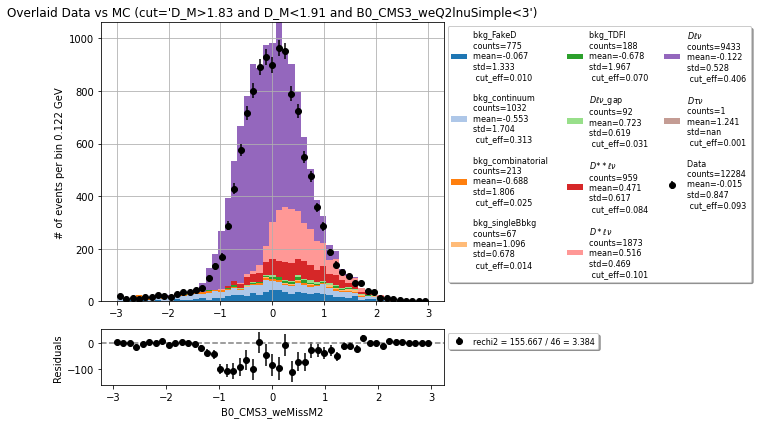

In [24]:
# signal
b1 = np.linspace(-3,3,50)
a,b=mpl.plot_data_mc_stacked(variable='B0_CMS3_weMissM2',bins=b1,figsize=(10,6),
                          cut='D_M>1.83 and D_M<1.91 and B0_CMS3_weQ2lnuSimple<3',
                          scale=[1,187/200],correction=False,mask=[],ratio=False,
                                                      legend_nc=3, legend_fs=8)

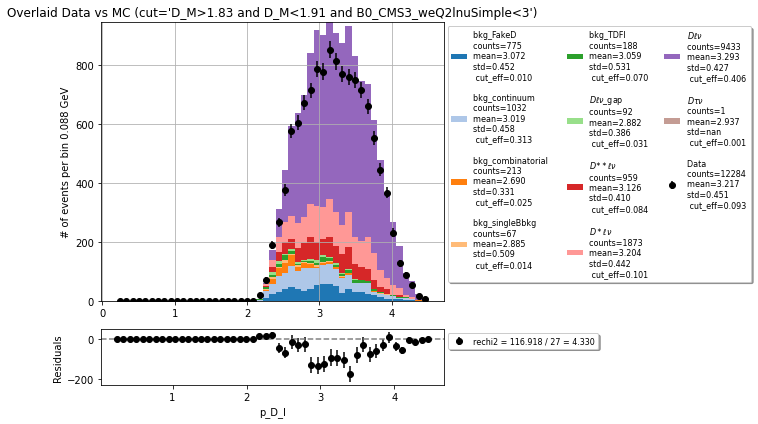

In [37]:
# signal
b2 = np.linspace(0.2,4.5,50)
a,b=mpl.plot_data_mc_stacked(variable='p_D_l',bins=b2,ratio=False,
                          cut='D_M>1.83 and D_M<1.91 and B0_CMS3_weQ2lnuSimple<3',
                          scale=[1,187/200],correction=False,mask=[],figsize=(10,6),
                                                      legend_nc=3, legend_fs=8)

### 4. -1 < deltaE < 0

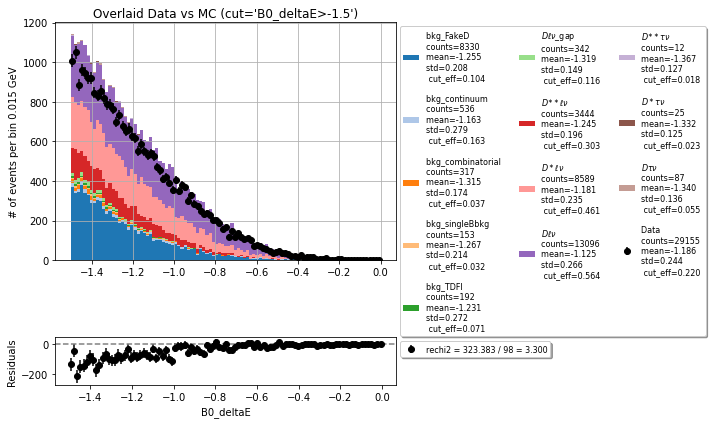

In [8]:
# showing the fake D and sidebands in D_M
b1 = np.linspace(-1.5,0,100)
data_hist_all, mc_hist_all = mpl.plot_data_mc_stacked(
    variable='B0_deltaE',bins=b1,cut='B0_deltaE>-1.5',scale=[1,187/200],
    correction=False,mask=[],figsize=(10,6),ratio=False,
                                legend_nc=3, legend_fs=8)

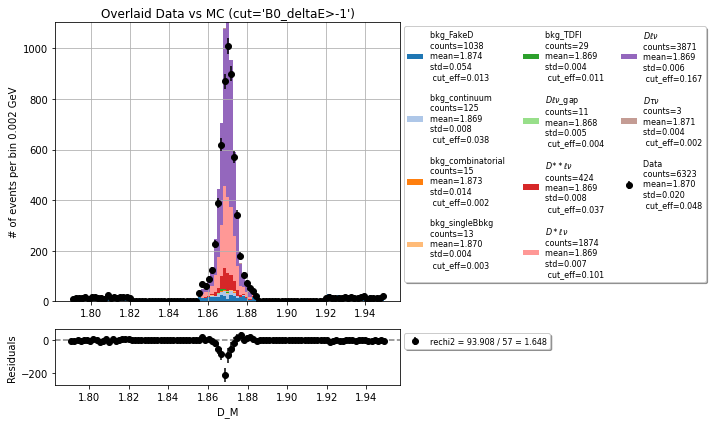

In [20]:
# showing the fake D and sidebands in D_M
b1 = np.linspace(1.79,1.95,100)
data_hist_all, mc_hist_all = mpl.plot_data_mc_stacked(
    variable='D_M',bins=b1,cut='B0_deltaE>-1',scale=[1,187/200],
    correction=False,mask=[],figsize=(10,6),ratio=False,
                                legend_nc=3, legend_fs=8)

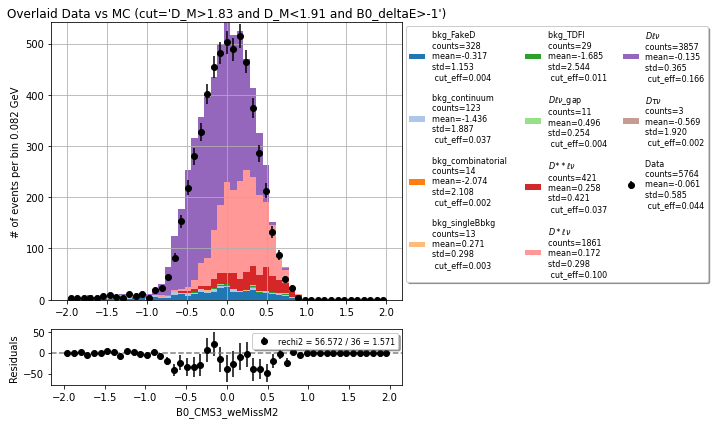

In [41]:
# signal
b1 = np.linspace(-2,2,50)
a,b=mpl.plot_data_mc_stacked(variable='B0_CMS3_weMissM2',bins=b1,figsize=(10,6),
                          cut='D_M>1.83 and D_M<1.91 and B0_deltaE>-1',
                          scale=[1,187/200],correction=False,mask=[],ratio=False,
                                                      legend_nc=3, legend_fs=8)

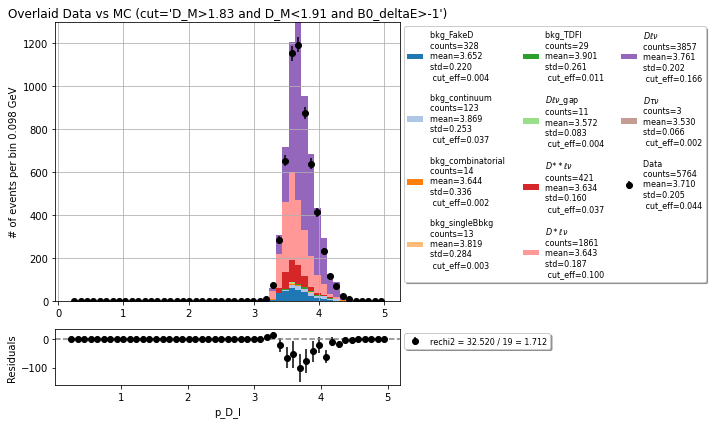

In [22]:
# signal
b2 = np.linspace(0.2,5,50)
a,b=mpl.plot_data_mc_stacked(variable='p_D_l',bins=b2,ratio=False,
                          cut='D_M>1.83 and D_M<1.91 and B0_deltaE>-1',
                          scale=[1,187/200],correction=False,mask=[],figsize=(10,6),
                                                      legend_nc=3, legend_fs=8)

### 5. CMS0_weDeltae

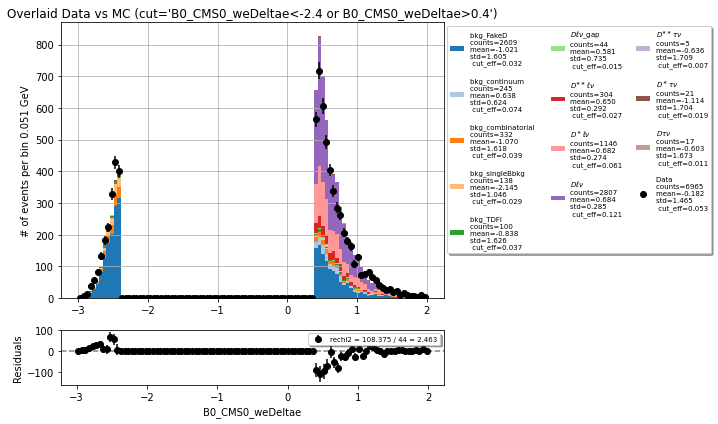

In [36]:
# showing the fake D and sidebands in D_M
b1 = np.linspace(-3,2,100)
data_hist_all, mc_hist_all = mpl.plot_data_mc_stacked(
    variable='B0_CMS0_weDeltae',bins=b1,cut='B0_CMS0_weDeltae<-2.4 or B0_CMS0_weDeltae>0.4',scale=[1,187/200],
    correction=False,mask=[],figsize=(10,6),ratio=False,
                                legend_nc=3, legend_fs=7)

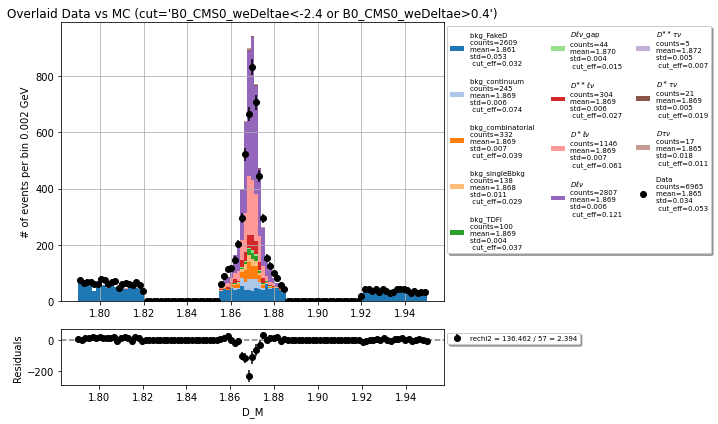

In [24]:
# showing the fake D and sidebands in D_M
b1 = np.linspace(1.79,1.95,100)
data_hist_all, mc_hist_all = mpl.plot_data_mc_stacked(
    variable='D_M',bins=b1,cut='B0_CMS0_weDeltae<-2.4 or B0_CMS0_weDeltae>0.4',scale=[1,187/200],
    correction=False,mask=[],figsize=(10,6),ratio=False,
                                legend_nc=3, legend_fs=7)

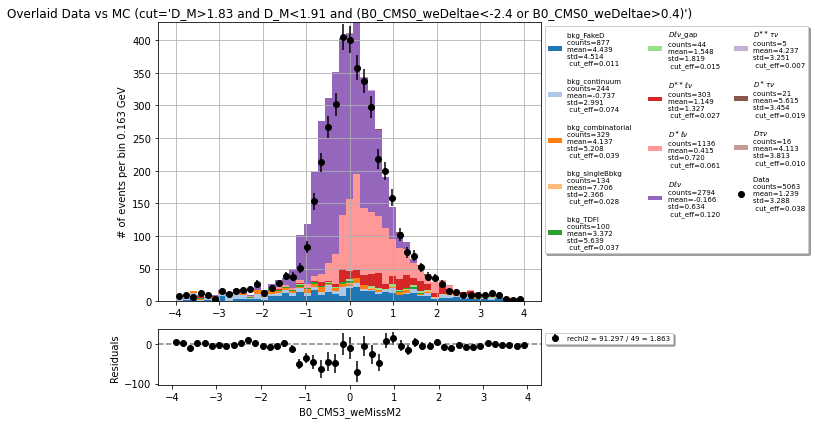

In [29]:
# signal
b1 = np.linspace(-4,4,50)
a,b=mpl.plot_data_mc_stacked(variable='B0_CMS3_weMissM2',bins=b1,figsize=(10,6),
                          cut='D_M>1.83 and D_M<1.91 and (B0_CMS0_weDeltae<-2.4 or B0_CMS0_weDeltae>0.4)',
                          scale=[1,187/200],correction=False,mask=[],ratio=False,
                                                      legend_nc=3, legend_fs=7)

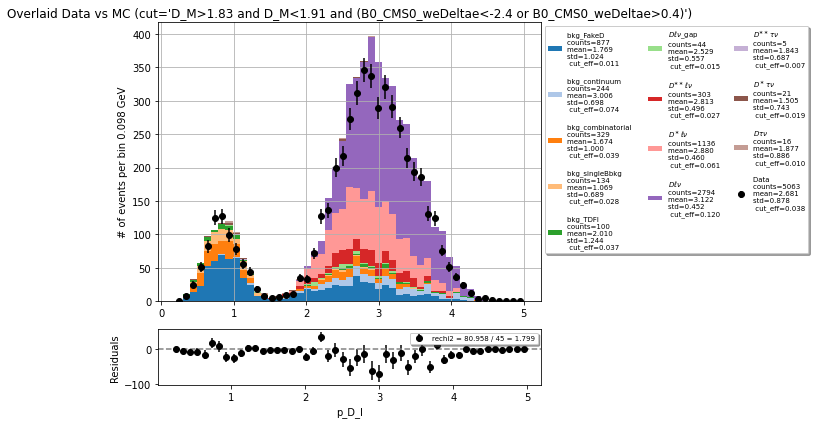

In [35]:
# signal
b2 = np.linspace(0.2,5,50)
a,b=mpl.plot_data_mc_stacked(variable='p_D_l',bins=b2,ratio=False,
                          cut='D_M>1.83 and D_M<1.91 and (B0_CMS0_weDeltae<-2.4 or B0_CMS0_weDeltae>0.4)',
                          scale=[1,187/200],correction=False,mask=[],figsize=(10,6),
                                                      legend_nc=3, legend_fs=7)